In [53]:
import numpy as np
import json
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data = pd.read_csv('./data/improved_profiles.csv')

In [4]:
data

,name,location,languages,description,rating,nb_reviews,price,skills,expertise,nb_projects,nb_buyers,last_active,gender
0,Maria H.,"Sheffield, United Kingdom",English speaking,We are a small UK based company speciaIising i...,4.9,4694,£25,"['animation', 'graphics design', 'brand design...","Industry expertise: IT, Internet, Marketing, M...",7672,4168,Apr 26 2021,female
1,Cormac Reynolds,"City of London, United Kingdom",English speaking,Looking for a link building solution or some g...,5.0,1190,£100,"['online marketing', 'link building', 'marketi...",NaN,1085,533,Apr 25 2021,NaN
2,Denise Toepel,"Cuenca, Ecuador","English, Spanish and French speaking",I am a Translation Specialist. I work in publ...,0.0,0,£20,"['English translation', 'French <=> English', ...",Industry expertise: Education and Telecommunic...,0,0,Apr 25 2021,female
3,Translate Guru .,"Cannanore, India",NaN,Hello! Hola! Ciao! Bonjour! 你好!\r\n\r\nI do hi...,4.9,598,$20,"['German <=> English translation', 'Arabic <=>...",NaN,721,376,Apr 26 2021,NaN
4,Logical Translation & Localisation,"City of London, United Kingdom","English, Spanish, French and Italian speaking",OFFERING A WIDE RANGE OF TRANSLATION SERVICES\...,4.9,135,£20,"['editing', 'proofreading', 'German translatio...","Industry expertise: Advertising, Aerospace, Au...",140,100,Apr 24 2021,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9998,Goggle Software Ltd,"Leeds, United Kingdom",English speaking,Goggle Software build CRMs and bespoke portals...,5.0,31,£50,"['ajax', 'database development', 'hosting deve...","Industry expertise: Electronics, IT and Techno...",26,22,Apr 15 2021,male
9999,Roshan Rupasinghe,"Colombo, Sri Lanka",English speaking,I am an IIBA certified business analyst with 3...,0.0,0,$12,"['business analysis', 'business writing', 'bus...",Industry expertise: IT,0,0,Dec 02 2020,NaN
10000,Sally Lavinia,"Nairobi, Kenya",English and Swahili (macrolanguage) speaking,NaN,0.0,0,$30,"['microsoft excel', 'proofreading', 'academic ...","Industry expertise: Financial Services, Intern...",0,0,Dec 30 2020,female
10001,Mohammed Younes,"Zgharta, Lebanon",Arabic and English speaking,"With a couple of years of experience, I was ab...",0.0,0,$15,"['graphics design', 'social media management',...","Industry expertise: Advertising, Food, Media a...",0,0,Apr 25 2021,male


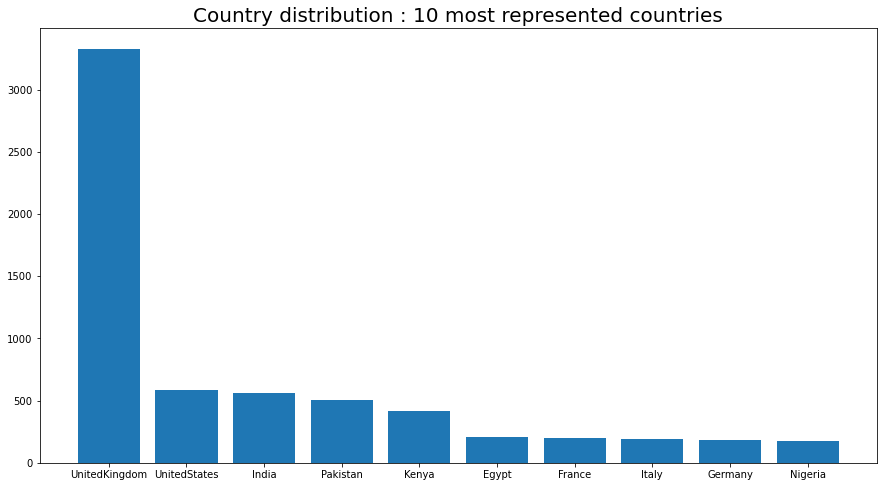

In [5]:
from collections import Counter

location = data['location']
country = []
for l in location :
    country.append(l.split(',')[-1].replace(" ", ""))
    
count = Counter(country).most_common(10)

figure = plt.figure(figsize=(15,8))
keys = [count[i][0] for i in range(len(count))]
values = [count[i][1] for i in range(len(count))]
plt.bar(keys, values)
plt.title("Country distribution : 10 most represented countries", fontsize = 20)
plt.show()

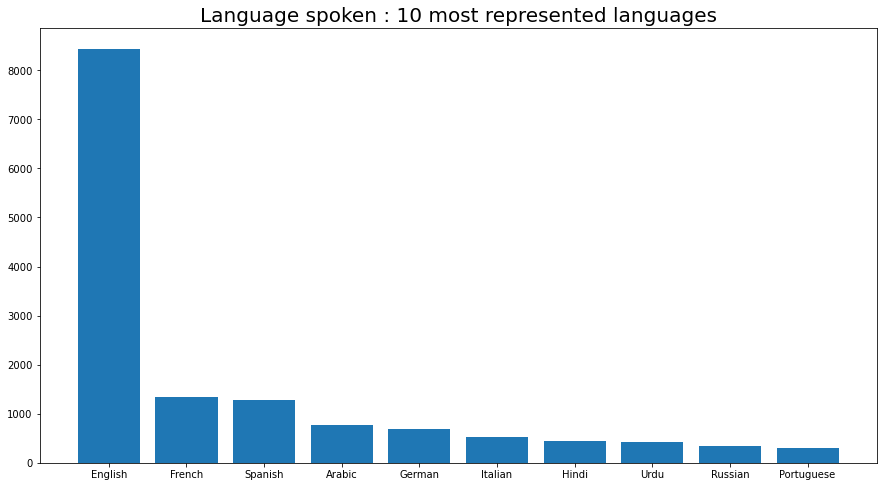

In [18]:
from collections import Counter
import re

speaking = data['languages']
language = []
for s in speaking :
    zeub = str(s).replace("speaking", "").replace("and", "").replace("nan", "")
    zanzi = re.findall(r"[\w']+", zeub)
    for l in zanzi :
        language.append(l)
    
count = Counter(language).most_common(10)

figure = plt.figure(figsize=(15,8))
keys = [count[i][0] for i in range(len(count))]
values = [count[i][1] for i in range(len(count))]
plt.bar(keys, values)
plt.title("Language spoken : 10 most represented languages", fontsize = 20)
plt.show()

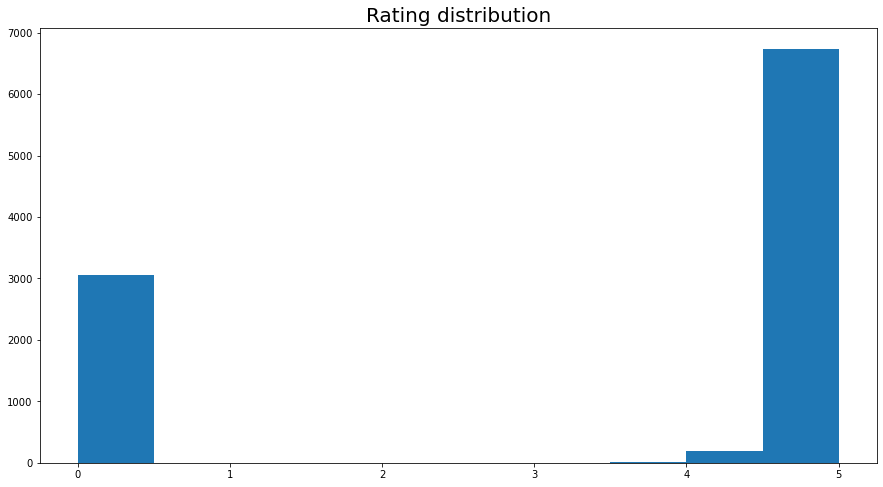

In [21]:
figure = plt.figure(figsize=(15,8))
plt.hist(data['rating'])
plt.title("Rating distribution", fontsize = 20)
plt.show()

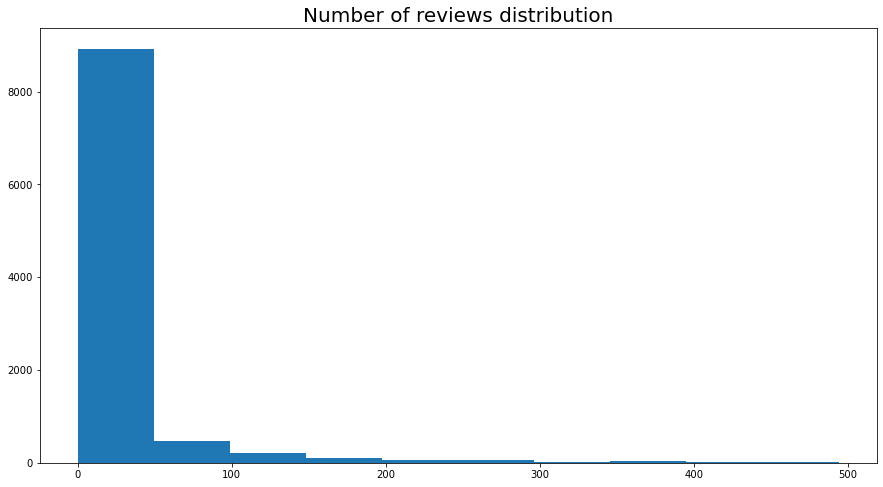

In [27]:
figure = plt.figure(figsize=(15,8))
plt.hist(data[data['nb_reviews']<500]['nb_reviews'])
plt.title("Number of reviews distribution", fontsize = 20)
plt.show()

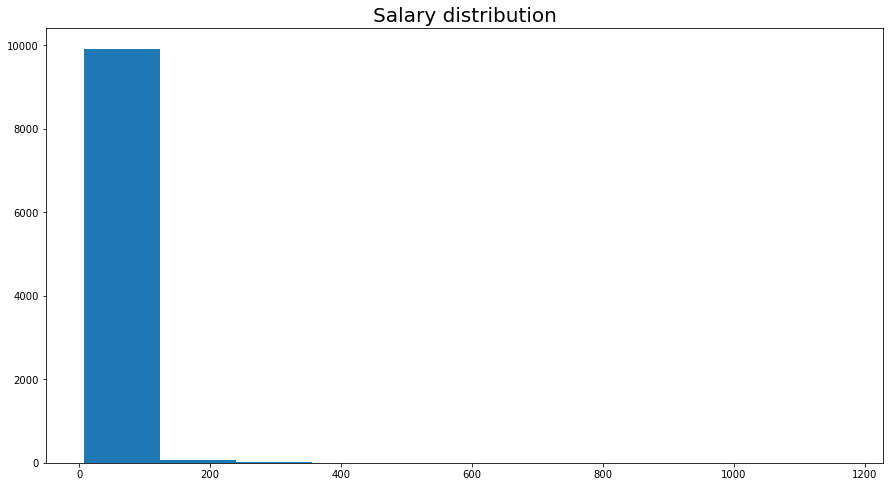

In [50]:
# put everything in dollars
salary = []
for i in range(len(data["price"])) :
    curr = data["price"][i][0]
    if curr == '£':
        salary.append(round(1.2 * float(data["price"][i][1:]),2))
    elif curr == '€':
        salary.append(round(1.38 * float(data["price"][i][1:]),2))
    else: 
        salary.append(float(data["price"][i][1:]))

figure = plt.figure(figsize=(15,8))
plt.hist(salary)
plt.title("Salary distribution", fontsize = 20)
plt.show()

(-11.077192266135112, 11.00367582219691, -11.27664201345355, 11.11672698918955)

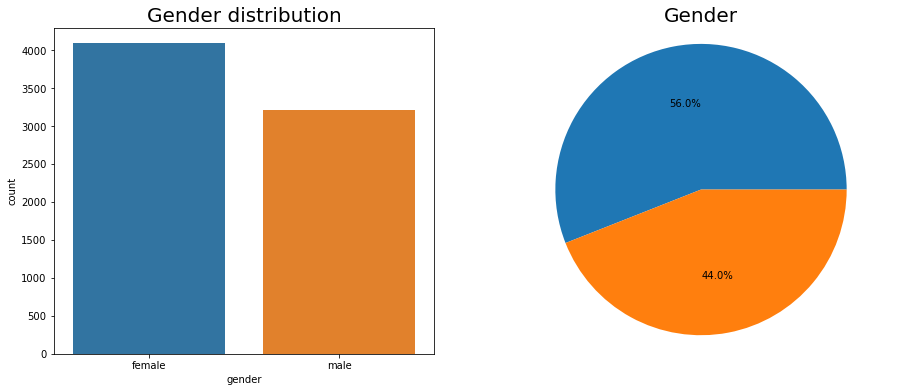

In [54]:
figure = plt.figure(figsize=(15,6))

axes = figure.add_subplot(121)
sns.countplot(x='gender', data=data)
plt.title("Gender distribution", color="black", fontsize = 20)


axes = figure.add_subplot(122)
axes.pie(data["gender"].value_counts(),radius = 10, autopct='%1.1f%%', textprops=dict(color="black"))
plt.title("Gender", color="black", fontsize = 20)
axes.axis('equal')